## Intro to Modern Data Mining

### Load the dataset and provide an overview of its structure (e.g., dimensions, missing values, types of variables).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("customer_churn.csv", index_col="CustomerID")
print("Shape:", df.shape)
print(df.info())
df.head()

Shape: (10000, 11)
<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, CUST00001 to CUST10000
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           10000 non-null  object 
 1   SeniorCitizen    10000 non-null  int64  
 2   Partner          10000 non-null  object 
 3   Dependents       10000 non-null  object 
 4   Tenure           10000 non-null  int64  
 5   PhoneService     10000 non-null  object 
 6   InternetService  10000 non-null  object 
 7   Contract         10000 non-null  object 
 8   MonthlyCharges   10000 non-null  float64
 9   TotalCharges     10000 non-null  float64
 10  Churn            10000 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 937.5+ KB
None


,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,InternetService,Contract,MonthlyCharges,TotalCharges,Churn
CustomerID,,,,,,,,,,,
CUST00001,Male,0,No,No,65,Yes,Fiber optic,Month-to-month,20.04,1302.60,No
CUST00002,Male,0,No,No,26,Yes,Fiber optic,Month-to-month,65.14,1693.64,No
CUST00003,Male,0,Yes,No,54,Yes,Fiber optic,Month-to-month,49.38,2666.52,No
CUST00004,Female,0,Yes,Yes,70,Yes,DSL,One year,31.19,2183.30,No
CUST00005,Male,0,No,No,53,Yes,DSL,Month-to-month,103.86,5504.58,Yes


In [4]:
df['SeniorCitizen'] = df['SeniorCitizen'].map({0: "No", 1: "Yes"})


In [5]:
unique_df = pd.concat([df.nunique(), df.agg(np.unique)], axis=1)
unique_df.rename(columns={0: "N_unique", 1 : "unique"}, inplace=True)
unique_df

,N_unique,unique
Gender,2,"[Female, Male]"
SeniorCitizen,2,"[No, Yes]"
Partner,2,"[No, Yes]"
Dependents,2,"[No, Yes]"
Tenure,72,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
PhoneService,2,"[No, Yes]"
InternetService,3,"[DSL, Fiber optic, No]"
Contract,3,"[Month-to-month, One year, Two year]"
MonthlyCharges,6366,"[20.02, 20.03, 20.04, 20.05, 20.07, 20.08, 20...."
TotalCharges,9610,"[0.0, 20.1, 20.38, 21.1, 21.27, 21.75, 21.97, ..."


### Explain why data mining is important for this dataset.

Mining this particular dataset is crucial for the business, an internet service provider it seems, because it might provide some key information to improvement in business process:
* `Customer Segmentation` - We can use data mining to cluster customer's into distinct classes based on factors like age, gender, internet services, and such.
* `Churn` - this column tells us which customer have decided to end their relationship/subription with the company and its services. Data mining will helps find the common patterns among those who have left and those who stays. Through data mining, we could predict which customer's are more likely to leave. This is crucial for retaining customers for longer period.
* `Factors` - consequently, we can identify some key factors to determine whether a customer will stay or leave, and make adjustments based on these insights.
* `Optimazation` - ultimately, the goal of Data Mining in this case is to optimize the business by revealing inefficiencies and scarcity in its services, and of course, make necessary adjustments and decisions to make the company both efficient and profitable.

## Data Visualization

Create at least three meaningful visualizations to explore relationships in the data (e.g., churn rate by tenure, service type, or monthly charges).

Text(0.5, 1.0, 'Normalized Count Per Churn')

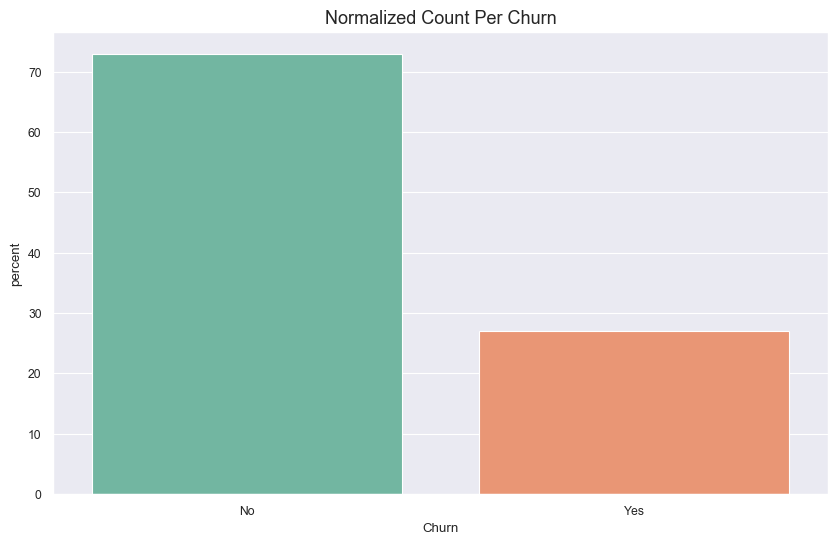

In [6]:
sns.set_context("paper")
sns.set_style("darkgrid")

plt.figure(figsize=(10,6))
sns.countplot(df, x="Churn", hue="Churn", stat="percent", palette="Set2")
plt.title("Normalized Count Per Churn", fontsize=13)

Starting with simple count distribution, it appears as though around 30% of our customer have `Churn=Yes`. Meaning around 30% of customers have left the company and its services.

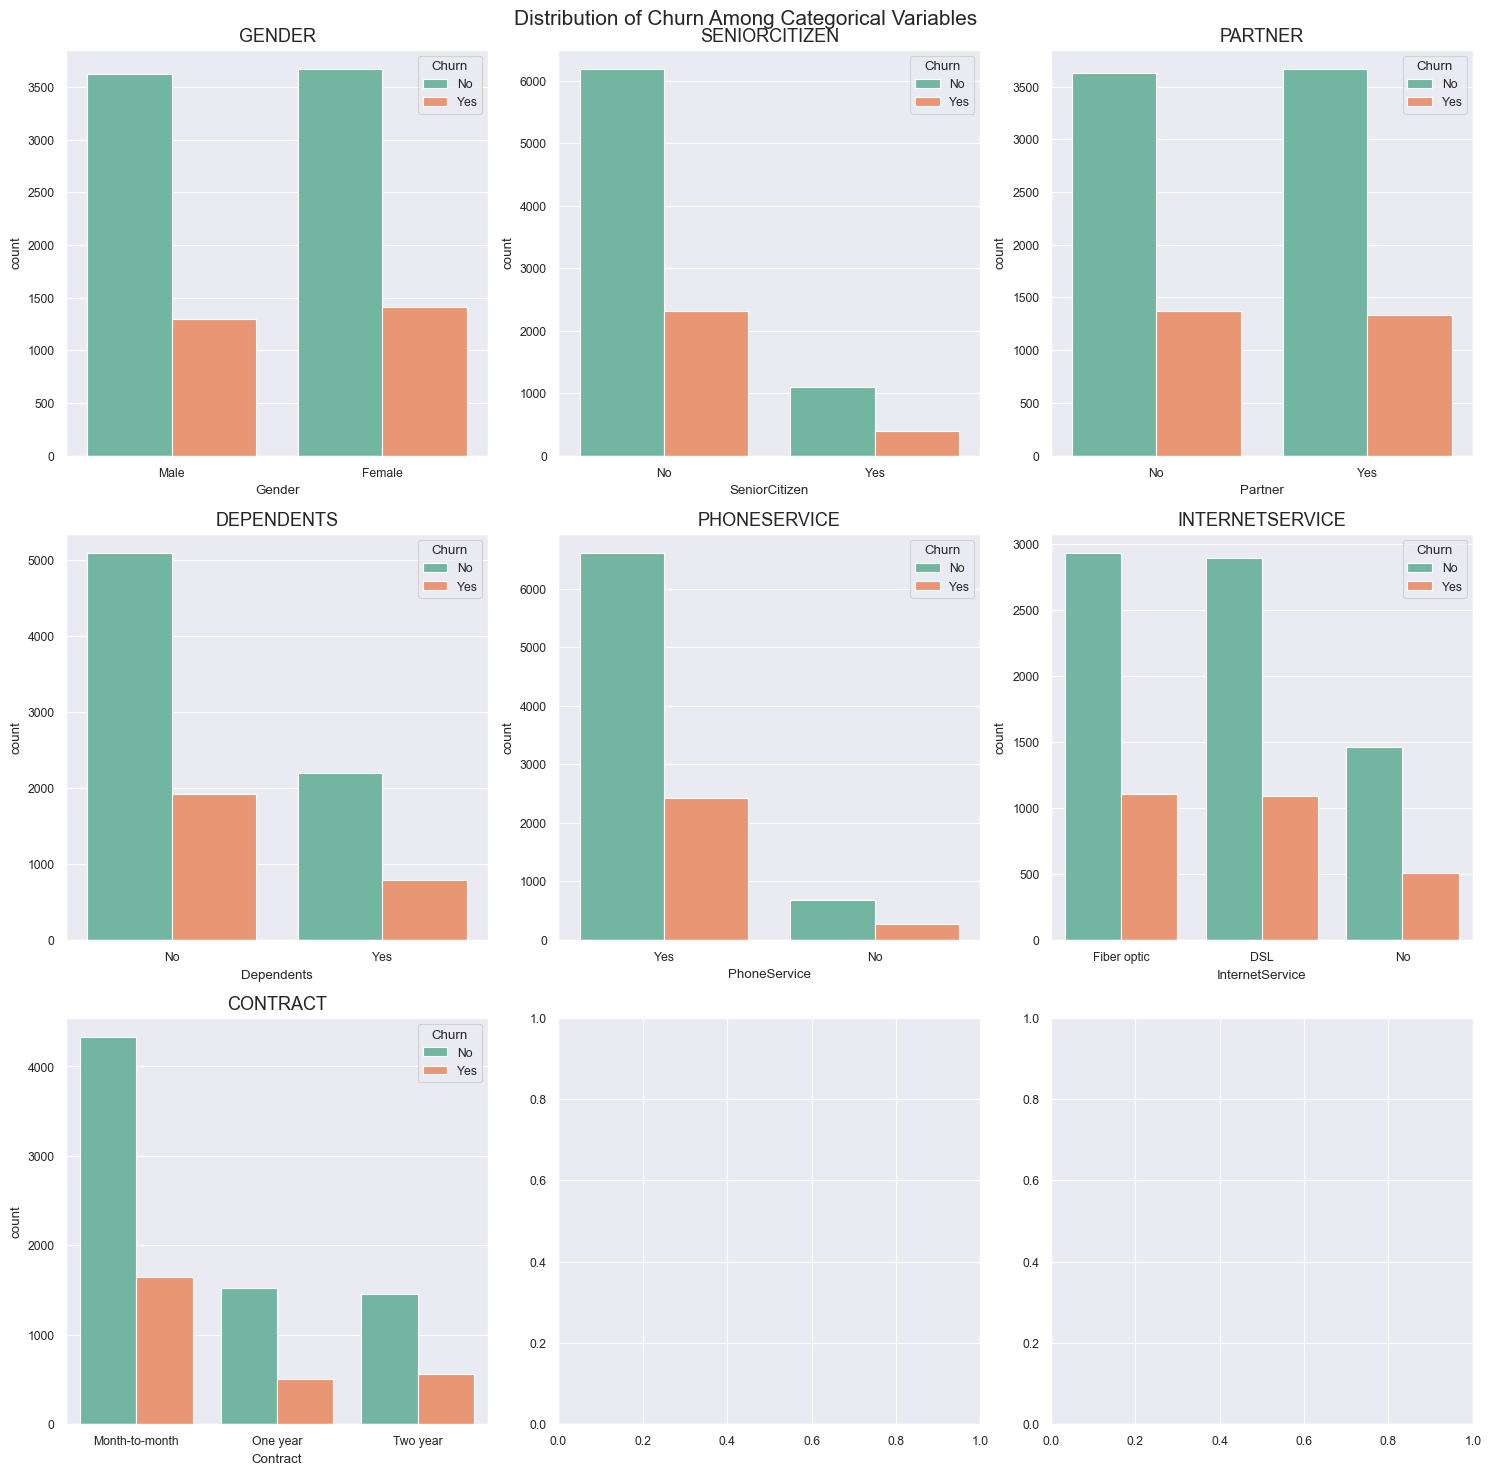

In [7]:
categorical_vars = df.select_dtypes(include='object').drop(columns="Churn").columns
ceil = int(np.ceil(len(categorical_vars)/ 3))

fig, ax = plt.subplots(ncols=3, nrows=ceil, figsize=(15, 5*ceil))

axes = ax.flatten()

for ax_n, var in zip(axes, categorical_vars):
    sns.countplot(x=df[var], hue=df["Churn"], ax=ax_n, palette="Set2")
    ax_n.set_title(var.upper(), fontsize=13)


fig.suptitle("Distribution of Churn Among Categorical Variables", fontsize=15)
plt.tight_layout();

From the figure above, we can begin to have a good idea of the attributes of the customer's eventually leaves (`Churn=Yes`, red) and from those who stays (`Churn=No`, green).
* `Gender` - the simillarity between Male and Female distribution implies that gender alone may not be a strong predictor for `Churn` status.
* `Partner` -  same as the `Gender` relationship.
* `For the rest` - although there exist a disparaty between different types under a certain column, the proportion of churners and non-churners appears to be exactly the same relative to the size of the said type.

It is interesting how all the categorical variables by themeselves aren't strong predictors for `Churn` status, at least visually. I'm intruigue how therese variables interact with each other. 

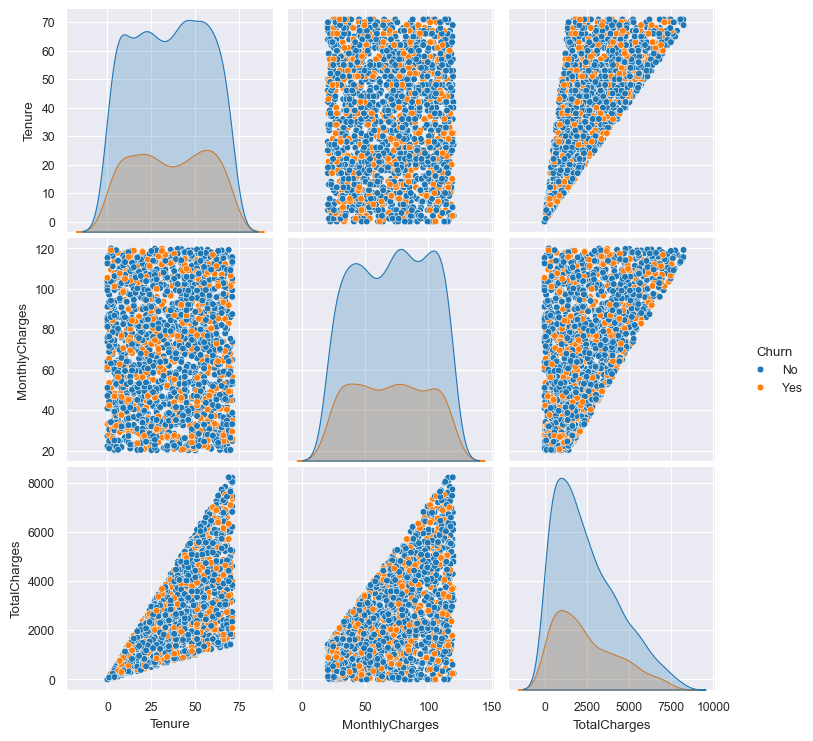

In [8]:
df_samples = df.sample(int(len(df)*0.20))
df_cols_floats = df_samples.select_dtypes("number").columns
sns.pairplot(df_samples[list(df_cols_floats) + ['Churn']], hue='Churn');

Simillar to the discrete variables, the continous ones also doesn't seem to show any particular trend or distinction when it comes to churners and non-churners. It is also the case that both churners and non-churners have mixed distribution through all the scatter plots, making it hard to create a clear distinction.

However, disregarding the `churner` part for a bit, we can can see some patterns that tells us the realtionship between continous variables in the scatterplots. 

## Data Transformation
### Handle missing values appropriately.


In [9]:
df.isna().sum()

Gender             0
SeniorCitizen      0
Partner            0
Dependents         0
Tenure             0
PhoneService       0
InternetService    0
Contract           0
MonthlyCharges     0
TotalCharges       0
Churn              0
dtype: int64

In [10]:
df.describe()

,Tenure,MonthlyCharges,TotalCharges
count,10000.000000,10000.000000,10000.000000
mean,35.220600,70.179457,2455.809794
std,20.787216,29.027645,1854.590358
min,0.000000,20.020000,0.000000
25%,17.000000,44.880000,961.207500
50%,35.000000,70.555000,2025.580000
75%,53.000000,95.772500,3610.985000
max,71.000000,119.990000,8425.570000


### Convert categorical variables into factor variables.

In [11]:
unique_df = pd.concat([df.nunique(), df.agg(np.unique)], axis=1)
unique_df.rename(columns={0: "N_unique", 1 : "unique"}, inplace=True)
unique_df

,N_unique,unique
Gender,2,"[Female, Male]"
SeniorCitizen,2,"[No, Yes]"
Partner,2,"[No, Yes]"
Dependents,2,"[No, Yes]"
Tenure,72,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
PhoneService,2,"[No, Yes]"
InternetService,3,"[DSL, Fiber optic, No]"
Contract,3,"[Month-to-month, One year, Two year]"
MonthlyCharges,6366,"[20.02, 20.03, 20.04, 20.05, 20.07, 20.08, 20...."
TotalCharges,9610,"[0.0, 20.1, 20.38, 21.1, 21.27, 21.75, 21.97, ..."


We'll use binary encoding for columns that have [No, Yes] as their column values, specifically:
* `SeniorCitizen`
* `Partner`
* `Dependents`
* `PhoneSerice`
* `InternetService`
* `Churn`

Note that the 'Yes' values for these columns will be the positive class or the encoded values as 1. 

We also ought to convert the column `Gender` to `IsMale` to make sense of binary encoding. 1 will be for male and 0 will be for female. 

For `Contract`, we'll use nominal encoding with the following mapping: {"Month-to-month" : 0, "One year" : 1, "Two year" : 2}. This is because of the inherent order in the values.

However, for `InternetService`, we can't assert any inherent order for its values, [DSL, Fiber optic, No]. For that reason, we'll use One-Hot-Encoding for this. Basically, we'll separate these three values into their own columns and have each row take the values of 0 or 1 for each of these new columns. If a row is `DSL=1`, it will also be `Fiber Optic=0` and `No=0`. This will prevent the machine to falsely assume any particular order among these values.

In [12]:
df_coded = df.copy()
mapping = {"No" : 0, "Yes" : 1}
binary_cols = ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'Churn']
df_coded[binary_cols] = df_coded[binary_cols].apply(lambda x : x.map(mapping))

In [13]:
df_coded['IsMale'] = df_coded["Gender"].map({"Female" : 0, "Male" : 1})

In [14]:
df_coded['Contract'] = df_coded['Contract'].map({"Month-to-month" : 0, "One year" : 1, "Two year" : 2})

In [15]:
df_coded = pd.get_dummies(df_coded, columns=['InternetService'], dtype=int)

In [16]:
df_coded.drop(columns="Gender", inplace=True)
df_coded.head()

,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,Contract,MonthlyCharges,TotalCharges,Churn,IsMale,InternetService_DSL,InternetService_Fiber optic,InternetService_No
CustomerID,,,,,,,,,,,,,
CUST00001,0,0,0,65,1,0,20.04,1302.60,0,1,0,1,0
CUST00002,0,0,0,26,1,0,65.14,1693.64,0,1,0,1,0
CUST00003,0,1,0,54,1,0,49.38,2666.52,0,1,0,1,0
CUST00004,0,1,1,70,1,1,31.19,2183.30,0,0,1,0,0
CUST00005,0,0,0,53,1,0,103.86,5504.58,1,1,1,0,0


In [17]:
unique_df_coded = pd.concat([df_coded.nunique(), df_coded.agg(np.unique), df_coded.dtypes], axis=1)
unique_df_coded.rename(columns={0: "N_unique", 1 : "unique", 2: "dtypes"}, inplace=True)
unique_df_coded

,N_unique,unique,dtypes
SeniorCitizen,2,"[0, 1]",int64
Partner,2,"[0, 1]",int64
Dependents,2,"[0, 1]",int64
Tenure,72,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",int64
PhoneService,2,"[0, 1]",int64
Contract,3,"[0, 1, 2]",int64
MonthlyCharges,6366,"[20.02, 20.03, 20.04, 20.05, 20.07, 20.08, 20....",float64
TotalCharges,9610,"[0.0, 20.1, 20.38, 21.1, 21.27, 21.75, 21.97, ...",float64
Churn,2,"[0, 1]",int64
IsMale,2,"[0, 1]",int64


### Normalize or standardize numerical features where necessary.

In [18]:
def standardized(x):
    mean = x.mean()
    std = x.std()
    return (x-mean)/ std
cols_to_standardize = ['Tenure', 'MonthlyCharges', 'TotalCharges']
df_coded[cols_to_standardize] = df_coded[cols_to_standardize].apply(standardized)

In [19]:
df_coded[cols_to_standardize].describe().loc[['mean', 'std']].apply(np.round)

,Tenure,MonthlyCharges,TotalCharges
mean,0.0,-0.0,0.0
std,1.0,1.0,1.0


## Data Wrangling

### Filter data to remove outliers.

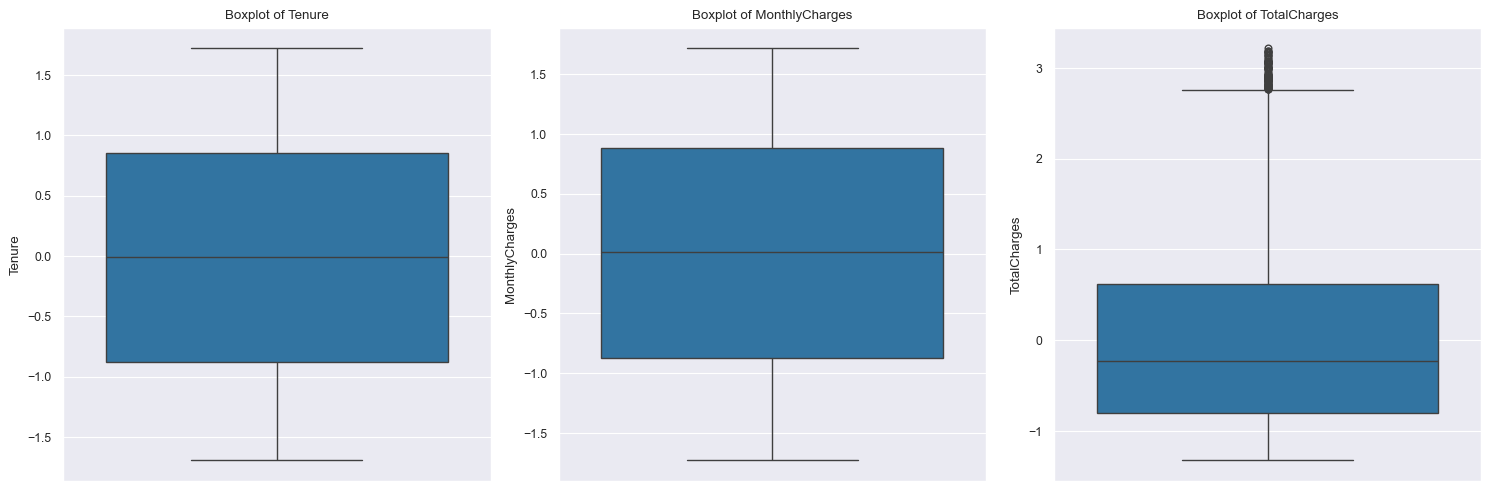

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, col in enumerate(cols_to_standardize):
    sns.boxplot(y=df_coded[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [21]:
samp = df_coded['TotalCharges']
q1, q3 = samp.quantile([0.25, 0.75])
iqr = q3 - q1
lower, upper = (q1 - 1.5*iqr, q3 + 1.5*iqr)
safe = samp.between(lower, upper, inclusive="both")
total_outliers = (~(safe)).sum()
print("Total Flagged Outliers:",total_outliers)
print(f"Percentage: {total_outliers*100/len(df_coded)}%")

Total Flagged Outliers: 72
Percentage: 0.72%


In [22]:
df_coded = df_coded[safe]

<Axes: ylabel='TotalCharges'>

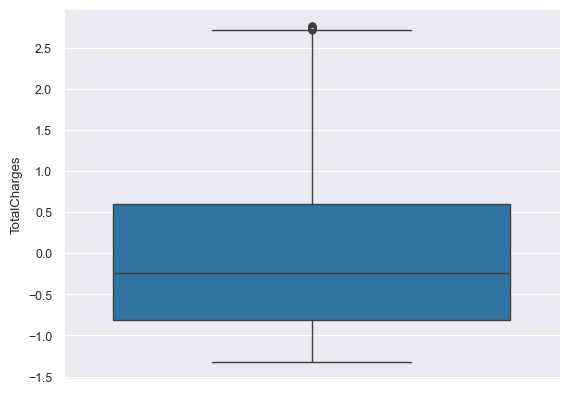

In [23]:
sns.boxplot(df_coded['TotalCharges'])

### Create new derived variables that may help in predictive modeling.

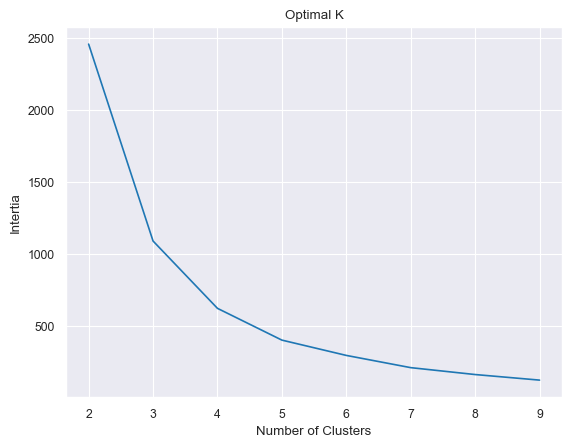

In [24]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

intertia = []
silhouette = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(df_coded['Tenure'].to_frame())
    intertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(df_coded['Tenure'].to_frame(), kmeans.labels_))

plt.plot(range(2, 10), intertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Intertia')
plt.title('Optimal K')
plt.show()

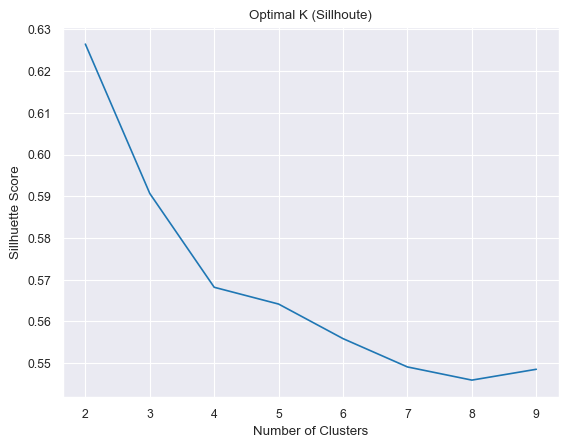

In [25]:
plt.plot(range(2, 10), silhouette)
plt.xlabel('Number of Clusters')
plt.ylabel('Sillhuette Score')
plt.title('Optimal K (Sillhoute)')
plt.show()

In [26]:
intertia = np.array(intertia)
mean_i = np.mean(intertia)
std_i = np.std(intertia)
stdz_i = (intertia - mean_i )/ std_i
stdz_i = stdz_i*-1

mean_s = np.mean(silhouette)
std_s = np.std(silhouette)
stdz_s = (silhouette - mean_s )/ std_s

In [27]:
weight_inertia = 0.4
weight_silhouette = 0.6

combined_score = (weight_inertia * stdz_i) + (weight_silhouette * stdz_s)
result = pd.Series(combined_score).sort_values(ascending=False)
result.index = result.index + 2
result

2    0.377720
3    0.285913
5    0.042058
4    0.016165
6   -0.093151
9   -0.171103
7   -0.205034
8   -0.252569
dtype: float64

Text(0.5, 1.0, 'PDF for Each Cluster')

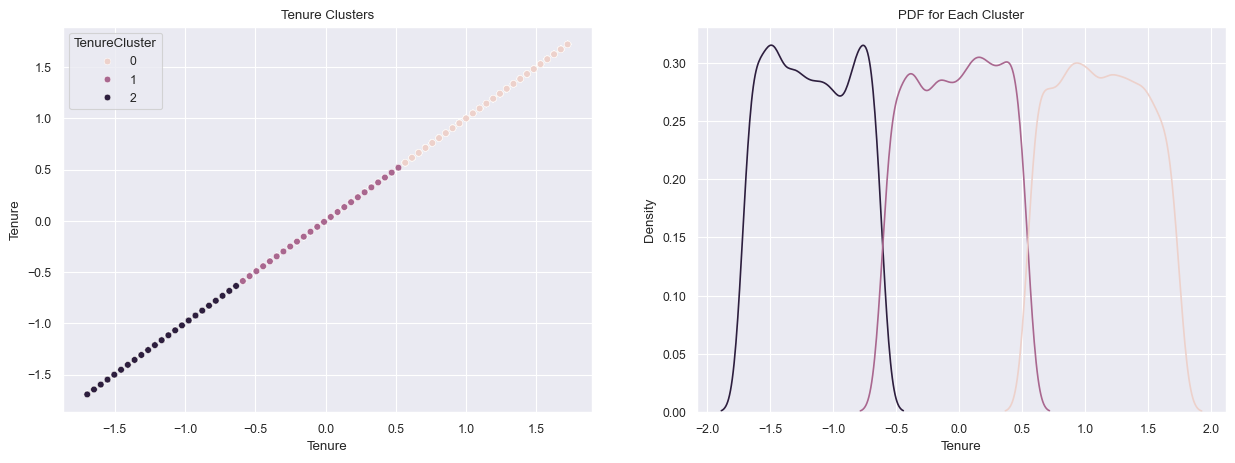

In [28]:
kmeans_final = KMeans(n_clusters=3, random_state=42).fit(df_coded[['Tenure']])
df_coded['TenureCluster'] = kmeans_final.predict(df_coded[['Tenure']])
df_coded[['Tenure', 'TenureCluster']].head() 

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(15,5))

sns.scatterplot(df_coded, x="Tenure", y="Tenure", hue="TenureCluster", ax=ax[0])
ax[0].set_title("Tenure Clusters")
sns.kdeplot(df_coded, x="Tenure", hue="TenureCluster", ax=ax[1], legend=False)
ax[1].set_title("PDF for Each Cluster")


In [29]:
mean = df_coded['TenureCluster'].mean()
std = df_coded['TenureCluster'].std()
df_coded['TenureCluster'] = (df_coded['TenureCluster'] - mean) / std

#### Average `MonthlyCharges` and Average `TotalCharges` Per Cluster

In [30]:
cluster_means = (
    df_coded.groupby("TenureCluster")[['MonthlyCharges', 'TotalCharges']]
    .mean()
    .rename(columns={"MonthlyCharges": "AvgMonthlyCharges", 
                     "TotalCharges" : "AvgTotalCharges"})
                     )

cluster_means

,AvgMonthlyCharges,AvgTotalCharges
TenureCluster,,
-1.216128,-0.086782,0.812073
0.009506,0.042217,0.010075
1.235140,0.011263,-0.906531


In [31]:
df_coded = df_coded.merge(cluster_means, how='left', left_on='TenureCluster', right_index=True)
df_coded['DevMonthlyCharges'] =  df_coded['AvgMonthlyCharges'] - df_coded['MonthlyCharges']
df_coded['DevTotalCharges'] = df_coded['AvgTotalCharges'] - df_coded['TotalCharges']
df_coded.head()

,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,Contract,MonthlyCharges,TotalCharges,Churn,IsMale,InternetService_DSL,InternetService_Fiber optic,InternetService_No,TenureCluster,AvgMonthlyCharges,AvgTotalCharges,DevMonthlyCharges,DevTotalCharges
CustomerID,,,,,,,,,,,,,,,,,,
CUST00001,0,0,0,1.432582,1,0,-1.727300,-0.621814,0,1,0,1,0,-1.216128,-0.086782,0.812073,1.640518,1.433887
CUST00002,0,0,0,-0.443571,1,0,-0.173609,-0.410964,0,1,0,1,0,0.009506,0.042217,0.010075,0.215826,0.421039
CUST00003,0,1,0,0.903411,1,0,-0.716540,0.113615,0,1,0,1,0,-1.216128,-0.086782,0.812073,0.629757,0.698458
CUST00004,0,1,1,1.673115,1,1,-1.343184,-0.146938,0,0,1,0,0,-1.216128,-0.086782,0.812073,1.256402,0.959011
CUST00005,0,0,0,0.855305,1,0,1.160292,1.643905,1,1,1,0,0,-1.216128,-0.086782,0.812073,-1.247074,-0.831832


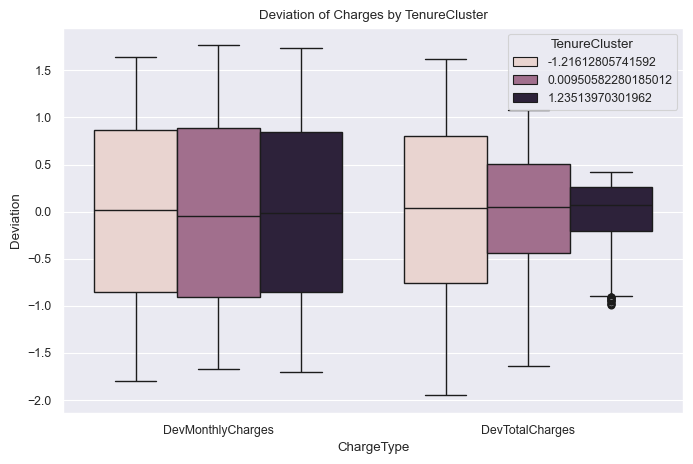

In [32]:
df_melted = df_coded.melt(
    id_vars=['TenureCluster'], 
    value_vars=['DevMonthlyCharges', 'DevTotalCharges'],
    var_name='ChargeType', 
    value_name='Deviation'
)

# Step 2: Boxplot with 'ChargeType' on x-axis, 'Deviation' on y-axis
plt.figure(figsize=(8,5))
sns.boxplot(
    x='ChargeType', 
    y='Deviation', 
    hue='TenureCluster', 
    data=df_melted
)
plt.title("Deviation of Charges by TenureCluster")
plt.show()

#### Churn rate by tenure, service type, or monthly charges

In [33]:
df_coded['SeniorWithDependents'] = ((df_coded['SeniorCitizen'] == 1) & (df_coded['Dependents'] == 1)).astype(int)

df_coded['SeniorAlone'] = ((df_coded['SeniorCitizen'] == 1) & (df_coded['Partner'] == 0) & (df_coded['Dependents'] == 0)).astype(int)

df_coded['YoungSingle'] = ((df_coded['SeniorCitizen'] == 0) & (df_coded['Partner'] == 0) & (df_coded['Dependents'] == 0)).astype(int)

df_coded['CoupleNoKids'] = ((df_coded['Partner'] == 1) & (df_coded['Dependents'] == 0)).astype(int)

df_coded['FamilyCustomer'] = ((df_coded['Partner'] == 1) & (df_coded['Dependents'] == 1)).astype(int)

df_coded['SingleParent'] = ((df_coded['Partner'] == 0) & (df_coded['Dependents'] == 1)).astype(int)


In [34]:
from scipy.stats import chi2_contingency

demographic_features = ['SeniorWithDependents', 'SeniorAlone', 'YoungSingle', 
                        'CoupleNoKids', 'FamilyCustomer', 'SingleParent']


for feature in demographic_features:
    contingency_table = pd.crosstab(df_coded[feature], df_coded['Churn'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"{feature}: p-value = {p:.5f}")


SeniorWithDependents: p-value = 0.61246
SeniorAlone: p-value = 0.74485
YoungSingle: p-value = 0.96782
CoupleNoKids: p-value = 0.40771
FamilyCustomer: p-value = 0.02042
SingleParent: p-value = 0.36989


In [35]:
from sklearn.ensemble import RandomForestClassifier

X = df_coded.drop(columns=['Churn'])
y = df_coded['Churn']

model = RandomForestClassifier(random_state=42)
model.fit(X, y)

importances = pd.Series(model.feature_importances_, index=X.columns)
print(importances.sort_values(ascending=False))

DevMonthlyCharges              0.173087
MonthlyCharges                 0.172529
TotalCharges                   0.171031
DevTotalCharges                0.168890
Tenure                         0.127944
Contract                       0.033466
IsMale                         0.023980
InternetService_DSL            0.013638
InternetService_Fiber optic    0.013494
PhoneService                   0.012621
SeniorCitizen                  0.012085
InternetService_No             0.010439
CoupleNoKids                   0.008244
Partner                        0.008104
YoungSingle                    0.007912
Dependents                     0.007076
SingleParent                   0.006124
AvgMonthlyCharges              0.005432
AvgTotalCharges                0.005395
TenureCluster                  0.005187
FamilyCustomer                 0.004802
SeniorWithDependents           0.004319
SeniorAlone                    0.004199
dtype: float64


In [36]:
low_importance_features = importances[importances < 0.006].index.tolist()

df_coded = df_coded.drop(columns=low_importance_features)
print("Dropped Features:", low_importance_features)


Dropped Features: ['TenureCluster', 'AvgMonthlyCharges', 'AvgTotalCharges', 'SeniorWithDependents', 'SeniorAlone', 'FamilyCustomer']


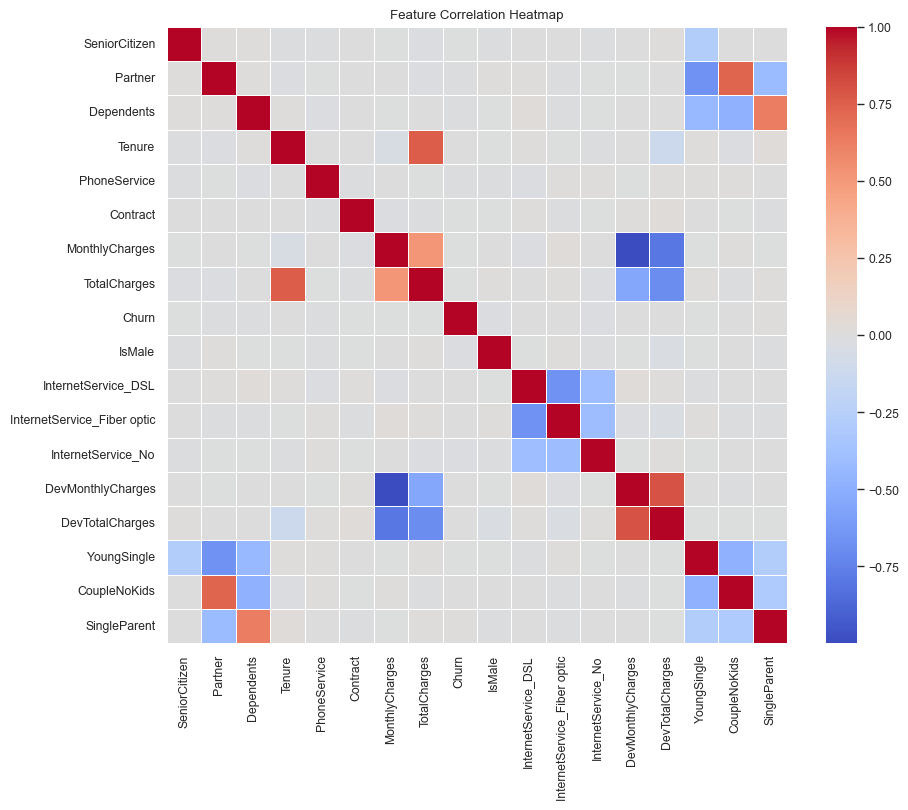

In [37]:
corr_matrix = df_coded.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [38]:
high_corr_pairs = corr_matrix.abs().unstack().sort_values(ascending=False)
high_corr_pairs = high_corr_pairs[high_corr_pairs != 1] 

high_corr_pairs = high_corr_pairs[high_corr_pairs > 0.85]
print(high_corr_pairs)

DevMonthlyCharges  MonthlyCharges       0.99846
MonthlyCharges     DevMonthlyCharges    0.99846
dtype: float64


In [39]:
from sklearn.ensemble import RandomForestClassifier

X = df_coded.drop(columns=['Churn'])
y = df_coded['Churn']

model = RandomForestClassifier(random_state=42)
model.fit(X, y)

importances = pd.Series(model.feature_importances_, index=X.columns)
print(importances.sort_values(ascending=False))

DevMonthlyCharges              0.177564
DevTotalCharges                0.177250
MonthlyCharges                 0.175072
TotalCharges                   0.174655
Tenure                         0.127922
Contract                       0.031459
IsMale                         0.022064
SeniorCitizen                  0.015171
InternetService_DSL            0.013809
InternetService_Fiber optic    0.013139
PhoneService                   0.011812
Partner                        0.011215
Dependents                     0.010456
CoupleNoKids                   0.010371
InternetService_No             0.010355
YoungSingle                    0.010179
SingleParent                   0.007506
dtype: float64


Between `MonthlyCharges` and `DevMonthlyCharges`, let's drop `Monthly Charges`

In [40]:
df_coded.drop(columns="MonthlyCharges", inplace=True)

### Final Dataset

In [41]:
df_coded.head()

,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,Contract,TotalCharges,Churn,IsMale,InternetService_DSL,InternetService_Fiber optic,InternetService_No,DevMonthlyCharges,DevTotalCharges,YoungSingle,CoupleNoKids,SingleParent
CustomerID,,,,,,,,,,,,,,,,,
CUST00001,0,0,0,1.432582,1,0,-0.621814,0,1,0,1,0,1.640518,1.433887,1,0,0
CUST00002,0,0,0,-0.443571,1,0,-0.410964,0,1,0,1,0,0.215826,0.421039,1,0,0
CUST00003,0,1,0,0.903411,1,0,0.113615,0,1,0,1,0,0.629757,0.698458,0,1,0
CUST00004,0,1,1,1.673115,1,1,-0.146938,0,0,1,0,0,1.256402,0.959011,0,0,0
CUST00005,0,0,0,0.855305,1,0,1.643905,1,1,1,0,0,-1.247074,-0.831832,1,0,0


## Unit 2: Tuning Predictive Models

### Split

In [42]:
from sklearn.model_selection import train_test_split

target = "Churn"

features = df_coded.drop(columns=target).columns

X = df_coded[features]
y = df_coded[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [62]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

print(f"Original class distribution: {np.bincount(y_train)}")
print(f"Resampled class distribution: {np.bincount(y_train_over)}")

from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)


Original class distribution: [5800 2142]
Resampled class distribution: [5800 5800]


d:\Anaconda\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


### Baseline

In [45]:
baseline = y.value_counts(normalize=True, ascending=False).iloc[0]
print("Baseline:", baseline)

Baseline: 0.7289484286865431



### Model Complexity

#### Fit a decision tree and logistic regression model.

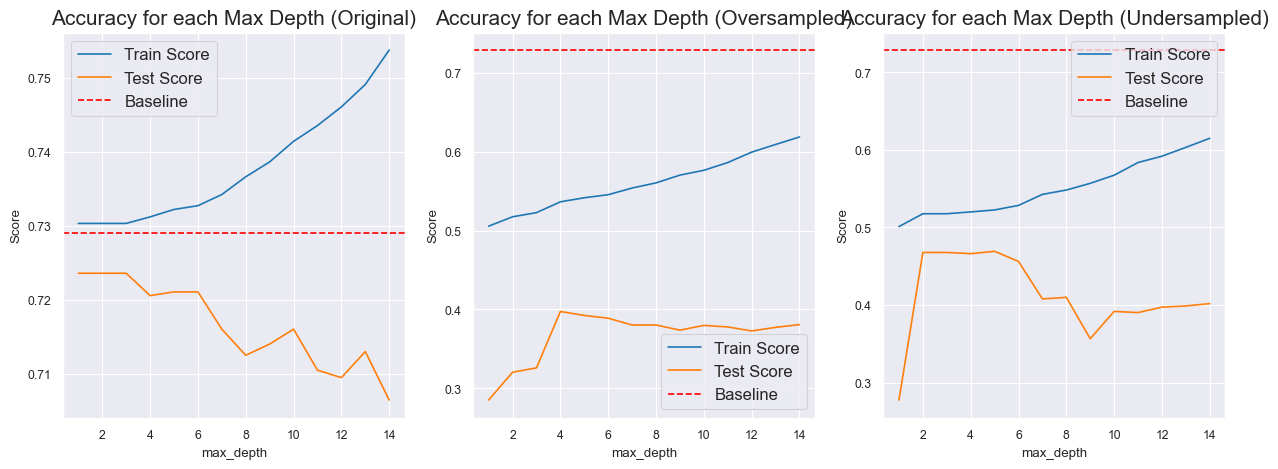

In [ ]:
from sklearn.tree import DecisionTreeClassifier

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
axes = ax.flatten()

dataset = [[X_train, y_train], [X_train_over, y_train_over], [X_train_under, y_train_under]]
title = ['Original', 'Oversampled', 'Undersampled']

for i in range(3):
    data = dataset[i]
    train_accuracy = []
    test_accuracy = []
    for k in range(1,15):
        decision_tree = DecisionTreeClassifier(max_depth=k,random_state=42).fit(data[0], data[1])
        train_accuracy.append(decision_tree.score(data[0], data[1]))
        test_accuracy.append(decision_tree.score(X_test, y_test))

    df_tree_scores = pd.DataFrame([{"max_depth" : k+1, 
                                    "train_score": train_accuracy[k], 
                                    "test_score": test_accuracy[k]}
                                        for k in range(14)])
    
    sns.lineplot(df_tree_scores, x="max_depth", y="train_score", label="Train Score", ax=axes[i])
    sns.lineplot(df_tree_scores, x="max_depth", y="test_score", label="Test Score", ax=axes[i])
    axes[i].set_title(title[i], fontsize=15)
    axes[i].axhline(y = baseline, color = 'r', linestyle = '--', label="Baseline") 
    axes[i].set_ylabel("Score")
    axes[i].legend(fontsize=12)

plt.suptitle("Decision Tree Accuracy for each Max Depth Value", fontsize=13)
plt.tight_layout();

In [74]:
from sklearn.linear_model import LogisticRegression

print("Baseline:", baseline)
print("")

for i in range(3):
    date = dataset[i]
    log_reg = LogisticRegression(max_iter=1000).fit(date[0], date[1])

    print(f"Logistic Regression Train Accuracy ({title[i]}):", log_reg.score(date[0], date[1]))
    print(f"Logistic Regression Test Accuracy ({title[i]}):", log_reg.score(X_test, y_test))
    print("")

Baseline: 0.7289484286865431

Logistic Regression Train Accuracy (Original): 0.7302946361118107
Logistic Regression Test Accuracy (Original): 0.7235649546827795

Logistic Regression Train Accuracy (Oversampled): 0.5398275862068965
Logistic Regression Test Accuracy (Oversampled): 0.5030211480362538

Logistic Regression Train Accuracy (Undersampled): 0.5165732959850607
Logistic Regression Test Accuracy (Undersampled): 0.4944612286002014



### Cross-Validation

In [83]:
from prettytable import PrettyTable
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict

log_reg = LogisticRegression(max_iter=1000)

for i in range(3):
    data = dataset[i]
    y_pred_cv = cross_val_predict(log_reg, data[0], data[1], cv=10, n_jobs=-1)
    report_dict = classification_report(data[1], y_pred_cv, output_dict=True)

    table = PrettyTable()
    table.field_names = ["Class", "Precision", "Recall", "F1-Score", "Support"]

    for label, metrics in report_dict.items():
        if isinstance(metrics, dict):
            table.add_row([label, round(metrics["precision"], 2), round(metrics["recall"], 2), round(metrics["f1-score"], 2), int(metrics["support"])])
    print(f"Classification Report ({title[i]})")
    print(table)


d:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report (Original)
+--------------+-----------+--------+----------+---------+
|    Class     | Precision | Recall | F1-Score | Support |
+--------------+-----------+--------+----------+---------+
|      0       |    0.73   |  1.0   |   0.84   |   5800  |
|      1       |    0.0    |  0.0   |   0.0    |   2142  |
|  macro avg   |    0.37   |  0.5   |   0.42   |   7942  |
| weighted avg |    0.53   |  0.73  |   0.62   |   7942  |
+--------------+-----------+--------+----------+---------+
Classification Report (Oversampled)
+--------------+-----------+--------+----------+---------+
|    Class     | Precision | Recall | F1-Score | Support |
+--------------+-----------+--------+----------+---------+
|      0       |    0.54   |  0.49  |   0.51   |   5800  |
|      1       |    0.53   |  0.58  |   0.55   |   5800  |
|  macro avg   |    0.53   |  0.53  |   0.53   |  11600  |
| weighted avg |    0.53   |  0.53  |   0.53   |  11600  |
+--------------+-----------+--------+---------

### Classification
#### Train a Random Forest classifier to predict customer churn.
#### Tune hyperparameters using grid search.

In [110]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rand_forest = RandomForestClassifier(random_state=42)

params = {
    "n_estimators": range(50, 300, 50),
    "max_depth": range(5, 20, 3),
    "min_samples_leaf": range(1, 5, 2),
    "max_features": ['sqrt', 'log2', None]
}

model = GridSearchCV(rand_forest, param_grid=params, cv=5, n_jobs=-1, verbose=2)
model.fit(X_train, y_train)
results = pd.DataFrame(model.cv_results_)
model.best_params_

Fitting 5 folds for each of 150 candidates, totalling 750 fits


{'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'n_estimators': 50}

#### Report final model performance.

In [111]:
best_rand_for = model.best_estimator_
y_pred_cv = cross_val_predict(best_rand_for, X_train_over, y_train_over, cv=10, n_jobs=-1)
print(classification_report(y_train_over, y_pred_cv))

              precision    recall  f1-score   support

           0       0.59      0.40      0.47      5800
           1       0.55      0.73      0.62      5800

    accuracy                           0.56     11600
   macro avg       0.57      0.56      0.55     11600
weighted avg       0.57      0.56      0.55     11600



In [124]:
best_rand_for = model.best_estimator_

best_rand_for.fit(X_train, y_train)
print("Baseline:", baseline)
print("Random Forest Train Accuracy:", best_rand_for.score(X_train, y_train))
print("Random Forest Test Accuracy:", best_rand_for.score(X_test, y_test))

Baseline: 0.7289484286865431
Random Forest Train Accuracy: 0.7302946361118107
Random Forest Test Accuracy: 0.7235649546827795


<Axes: >

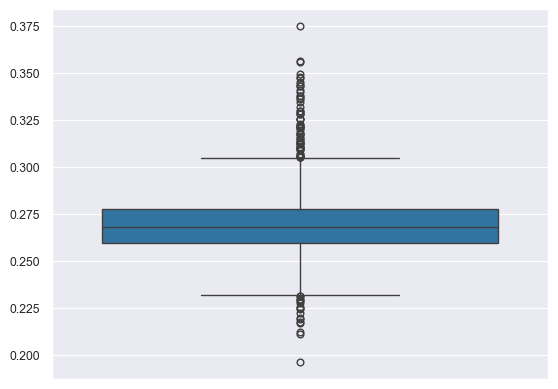

In [127]:
sns.boxplot(y_proba)

In [ ]:
mean_ = 

0.2694762766153724

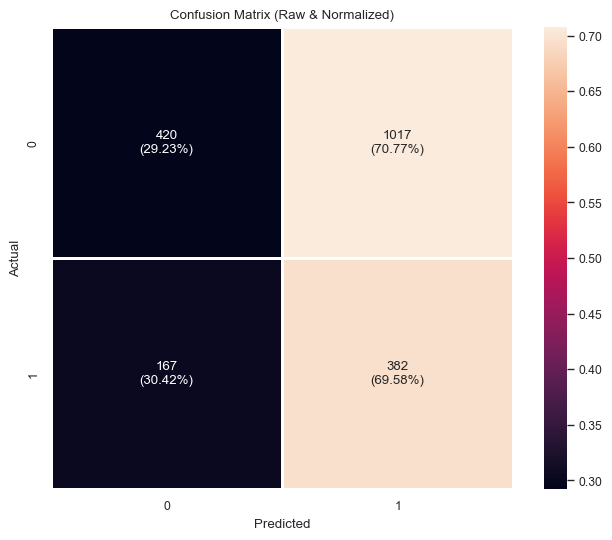

In [135]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error

y_proba = best_rand_for.predict_proba(X_test)[:, 1]
# threshold = y_proba.mean() + 0.1
threshold= 1 - baseline - 0.01
y_pred_custom = (y_proba > threshold).astype(int)

cm = confusion_matrix(y_test, y_pred_custom)

cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

labels = np.asarray([
    [f"{v}\n({p:.2%})" for v, p in zip(row_raw, row_norm)]
    for row_raw, row_norm in zip(cm, cmn)
])

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cmn, annot=labels, fmt='', linewidths=1, square=True)

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix (Raw & Normalized)')
plt.show()
